In [32]:
import numpy as np
import matplotlib.pyplot as plt

Entropía para una variable.


In [33]:

def entropia (marg,ancho_bin):
    h = 0
    for p in marg:
        if p!= 0:
            h+=p*np.log2(p/ancho_bin)
    return -h

def entropia_conjunta(p,ancho_bin_x,ancho_bin_y):
    h = 0
    for x in p :
        for y in x:
            if y != 0:
              h-= y*np.log2(y/(ancho_bin_x*ancho_bin_y))
    return h

Calcular la función densidad marginal, una y dos variables, y calcular su entropía

Una variable

In [34]:
def get_density(X, n_bins):
    hist, bin_edges = np.histogram(X, bins=n_bins)
    ancho_bin = bin_edges[1] - bin_edges[0]
    x = (hist/np.sum(hist)) 
    return x,ancho_bin



Densidad conjunta

In [35]:
def get_conju_marg(ancho,largo,bins):
    H, x_edges, y_edges = np.histogram2d(ancho,largo, bins=(bins, bins), range=((min(ancho), max(ancho)),(min(largo), max(largo))))
    p_conju = H/np.sum(H)
    margi_A= np.sum(H, axis=0)
    p_A = margi_A/np.sum(H)
    margi_L = np.sum(H,axis = 1)
    p_L = margi_L/np.sum(H)
    ancho_bin_x = x_edges[1]-x_edges[0]
    ancho_bin_y = y_edges[1]-y_edges[0]
    return H,p_conju,p_A,p_L,margi_A,margi_L,ancho_bin_x,ancho_bin_y
    

→ Consigna: estimar la entropía de una uniforme (-3,3) y normal(0,1)

In [36]:
N = 2000
bins = 6
muestrasUniformes = np.random.uniform(-3,3,N)
muestrasNormales = np.random.normal(0,1,N)


ver los histogramas

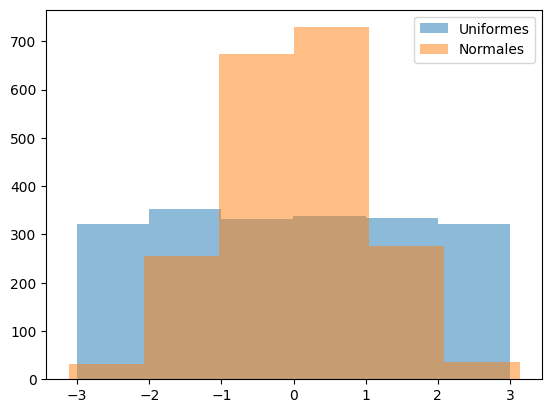

In [37]:
plt.hist(muestrasUniformes, bins=bins, alpha=0.5, label='Uniformes')
plt.hist(muestrasNormales, bins=bins, alpha=0.5, label='Normales')
plt.legend()
plt.show()

Calculo las entropias de cada muestra

In [38]:
#calculo la entropia de ambas muestras

D_uni,ancho_bins_u = get_density(muestrasUniformes, bins)
D_norm,ancho_bins_n = get_density(muestrasNormales, 100)
entro_uni = entropia(D_uni,ancho_bins_u)
entro_norm = entropia (D_norm,ancho_bins_n)

print("Entropia de la muestra uniforme: ",entro_uni)
print("Entropia de la muestra normal: ",entro_norm)

Entropia de la muestra uniforme:  2.5836263891247775
Entropia de la muestra normal:  1.9820185329273305


***INFORMACIÓN MUTUA***

In [39]:
def mutual_info(p_conju, p_A, p_L,n_bins):
    suma = 0
    for x in range(n_bins):
        for y in range(n_bins):
            if p_conju[x,y] >0: 
                suma += p_conju[x,y] * np.log2(p_conju[x,y] / (p_A[y]*p_L[x])) 
    return suma

Para calcular la entropía conjunta entre dos variables

In [40]:
def charge_data(cant_dat,filename):
    with open (filename,'r') as f:
        lineas = f.readlines()
        for l in lineas:
            l= l.strip().split(',')
            for data_type in cant_dat:
                if l[0] == data_type:
                    cant_dat[data_type][0].append(int(l[1]))
                    cant_dat[data_type][1].append(int(l[2]))
                    
data = {'C1':[[],[]],'C2':[[],[]]} 
charge_data(data,'datos.csv')


n_bins = 5
H1,conj1,p_a1,p_l1,mg_a1,mg_l1,ancho_bin_x1,ancho_bin_y2 = get_conju_marg(data['C1'][0],data['C1'][1],n_bins)
H2,conj2,p_a2,p_l2,mg_a2,mg_l2,ancho_bin_x,ancho_bin_y= get_conju_marg(data['C2'][0],data['C2'][1],n_bins)
min_length = min(len(data['C1'][0]), len(data['C2'][0]))
H3,conj1_2A,p_A1,p_A2,mg_A1,mg_A2,ancho_bin_x,ancho_bin_y= get_conju_marg(data['C1'][1][:min_length],data['C2'][1][:min_length],n_bins)
H4,conj1_2L,p_L1,p_L2,mg_L1,mg_L2,ancho_bin_x,ancho_bin_y = get_conju_marg(data['C1'][0][:min_length],data['C2'][0][:min_length],n_bins)


In [41]:
print (f"I(A1||L1)→ {mutual_info(conj1,p_a1,p_l1,n_bins):.4f}")
print (f"I(A1||A2)→ {mutual_info(conj1_2A,p_A1,p_A2,n_bins):.4f}")
print (f"I(L1||L2)→ {mutual_info(conj1_2L,p_L1,p_L2,n_bins):.4f}")

I(A1||L1)→ 0.5300
I(A1||A2)→ 0.0796
I(L1||L2)→ 0.0459
